### Question – 1 (Using Python)

**2. Which product family produces higher number of defective parts? (Defect - Any unit with measurement greater than upper limit) – Please demonstrate using a pareto chart**

***Answer***

To address this inquiry, I employed a Pareto chart. In this context, "defective parts" are characterized as samples exceeding the upper limit (USL), as stipulated within the product's specifications sheet, and these measurements are taken in terms of ***height*** (T_Height) and ***weight*** (T_Weight). Product family is extracted from the product code prefix.

1. Initially, I present defects categorized by product family in relation to the measurement of ***T_Height***.
2. Subsequently, I display defects categorized by product family in relation to the measurement of ***T_Weight***
3. Finally, I offer a comprehensive overview of Total defects categorized by product family by considering both measurements, ***T_Height*** and ***T_Weight*** at the same time and .


The following lines of code are responsible for reading data from the provided sheets, creating essential functions, and configuring variables to set the stage for subsequent lines of code.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
####################################################################################################################################

# Read measurements and specifications from input data file
measurements = pd.read_excel('../data/question_1_2.xlsx', sheet_name='Measurements', skiprows=1)
specifications = pd.read_excel('../data/question_1_2.xlsx', sheet_name='Specifications', skiprows=1)
####################################################################################################################################

# Check whether the given measurement is greater than its USL 
def is_upper_specifications_usl(row, measurement):
    if measurement == 'T_Height':
        t_name = 'T_height'
    else:
        t_name = 'T_weight'
    usl = specifications.loc[(specifications['Product Code'] == row['Product Code']) & (specifications['T_Name'] == t_name)]['USL'].values[0]
    return (row[measurement] > usl)

# Count samples in the group exceeding USL
def upper_limit_count(group, measurement):
    return group[group.apply(is_upper_specifications_usl, measurement = measurement, axis=1)].shape[0]

# Return pareto chart plot for a given data (in Dataframe structure form) according to the given key and variable
def pareto_chart_plot(data_frame, key, variable, title, yaxis_major_locator_integer = True):
    cumulative_column_name = 'Cumulative ' + variable
    percentage_column_name = cumulative_column_name + ' Percentage'

    sorted_df = data_frame.sort_values(by=variable, ascending=False)
    # Calculate the cumulative defect measurement
    sorted_df[cumulative_column_name] = sorted_df[variable].cumsum()
    # Calculate the percentage of measurement agg
    total = sorted_df[variable].sum()
    sorted_df[percentage_column_name] = (sorted_df[cumulative_column_name] / total) * 100

    # Create the Pareto chart
    fig, ax1 = plt.subplots()
    ax1.bar(sorted_df[key], sorted_df[variable], color='b', alpha=0.7, label=variable)
    ax1.set_xlabel(key)
    ax1.set_ylabel(variable, color='b')
    ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=yaxis_major_locator_integer))

    ax2 = ax1.twinx()
    ax2.plot(sorted_df[key], sorted_df[percentage_column_name], color='r', marker='o', label=percentage_column_name)
    ax2.set_ylabel(percentage_column_name, color='r')
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.axhline(80, color="orange", linestyle="dashed")
    ax1.tick_params(axis="y", colors="b")
    ax2.tick_params(axis="y", colors="r")
    ax2.set_ylim([0,110])
    plt.xticks(rotation=45)
    plt.title(title)
    return plt

# Count samples above USL per group for the specified measurement.
def measurement_upper_limit_agg(groups, measurement):
    aggregated_groups = groups.apply(upper_limit_count, measurement = measurement)
    return aggregated_groups

####################################################################################################################################


# Group measurements by product family, extracting it from product code prefix.
measurements['Product Family'] = measurements['Product Code'].apply(lambda product_code: product_code.split('_')[0])
product_families = measurements.groupby(measurements['Product Family'])#.apply(lambda product_code: product_code.split('_')[0]))




Expanding upon the preceding code, the following code generates ***Pareto Chart*** to illustrate defects categorized by product family concerning the ***T_Height*** measurement. Furthermore, this code identifies the product family with the highest count of defective components in terms of ***height***, adhering to the criteria stipulated in the question (Defect - Any unit with a measurement exceeding the upper limit).

Product family LIF001  has the most T_Height defects above the USL


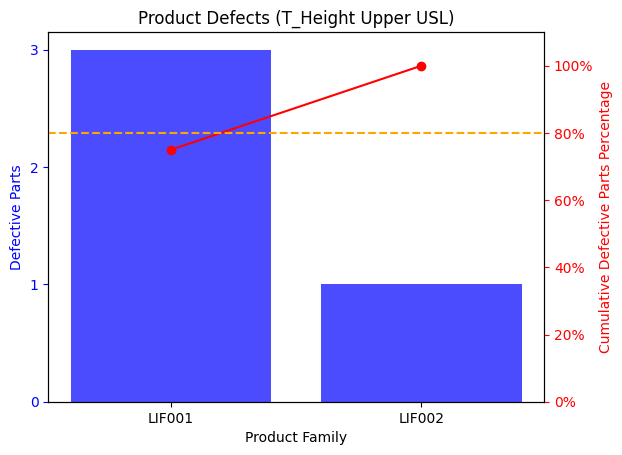

In [2]:

# Note: Ensure previous code cells have been executed...

height_upper_usl_defects = measurement_upper_limit_agg(product_families, 'T_Height').reset_index(name = 'Defective Parts')
max_height_upper_usl_defective_family = height_upper_usl_defects[height_upper_usl_defects['Defective Parts'] == height_upper_usl_defects['Defective Parts'].max()]
print(f"Product family {max_height_upper_usl_defective_family['Product Family'].values[0]}  has the most T_Height defects above the USL")

height_upper_usl_defects_plot = pareto_chart_plot(height_upper_usl_defects, 'Product Family', 'Defective Parts', 'Product Defects (T_Height Upper USL)')
height_upper_usl_defects_plot.savefig('../output/height_upper_usl_defects_pareto.png', bbox_inches='tight')

Expanding upon the preceding code, the following code generates ***Pareto Chart*** to illustrate defects categorized by product family concerning the ***T_Weight*** measurement. Furthermore, this code identifies the product family with the highest count of defective components in terms of ***weight***, adhering to the criteria stipulated in the question (Defect - Any unit with a measurement exceeding the upper limit).

Product family LIF002  has the most T_Weight defects above the USL


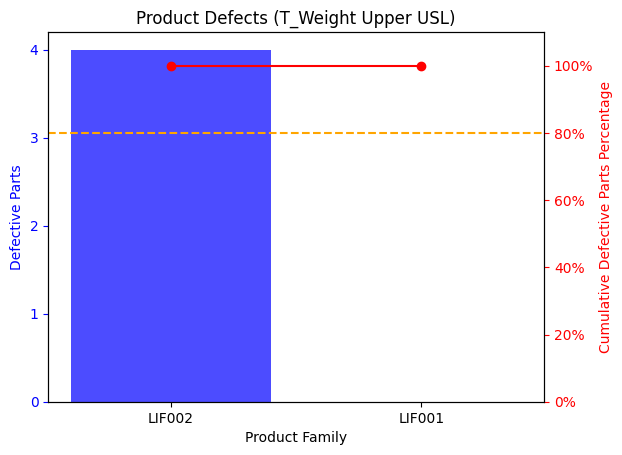

In [6]:

# Note: Ensure previous code cells have been executed...

weight_upper_usl_defects = measurement_upper_limit_agg(product_families, 'T_Weight').reset_index(name = 'Defective Parts')
max_weight_upper_usl_defective_family = weight_upper_usl_defects[weight_upper_usl_defects['Defective Parts'] == weight_upper_usl_defects['Defective Parts'].max()]
print(f"Product family {max_weight_upper_usl_defective_family['Product Family'].values[0]}  has the most T_Weight defects above the USL")

weight_upper_usl_defects_plot = pareto_chart_plot(weight_upper_usl_defects, 'Product Family', 'Defective Parts', 'Product Defects (T_Weight Upper USL)')
weight_upper_usl_defects_plot.savefig('../output/question_1_2_weight_upper_usl_defects_pareto.png', bbox_inches='tight')

Building upon the previous code, the following code constructs a Pareto Chart to visually represent defects categorized by product family, taking into account both ***T_Height*** and ***T_Weight*** measurements. This code also pinpoints the product family with the highest count of defective parts concerning either height or weight—in accordance with the criteria outlined in the question (Defect - Any unit with a measurement surpassing the upper limit). Therefore, in this context, a sample is deemed defective if it exceeds the upper limit in either its height or weight measurement.

Product family LIF002  has the most T_Weight and T_Height defects above the USL.


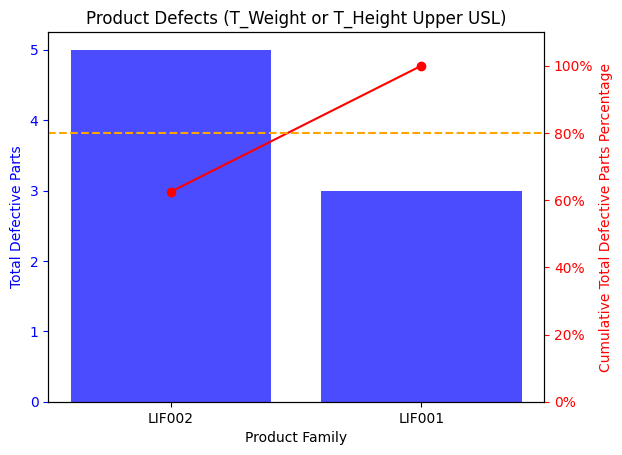

In [5]:
 # Note: Ensure previous code cells have been executed...

total_upper_usl_defects = height_upper_usl_defects.merge(weight_upper_usl_defects, on='Product Family', suffixes=('_height', '_weight'))
total_upper_usl_defects['Total Defective Parts'] = total_upper_usl_defects['Defective Parts_height'] + total_upper_usl_defects['Defective Parts_weight']

max_total_upper_usl_defective_family = total_upper_usl_defects[total_upper_usl_defects['Total Defective Parts'] == total_upper_usl_defects['Total Defective Parts'].max()]
print(f"Product family {max_total_upper_usl_defective_family['Product Family'].values[0]}  has the most T_Weight and T_Height defects above the USL.")

total_upper_usl_defects_plot = pareto_chart_plot(total_upper_usl_defects, 'Product Family', 'Total Defective Parts', 'Product Defects (T_Weight or T_Height Upper USL)')
total_upper_usl_defects_plot.savefig('../output/question_1_2_total_upper_usl_defects_pareto.png', bbox_inches='tight')
